# DAP 1. kisházifeladat
## Beadási határidő: 2021. 03. 08.

Egy áruház adatain fogunk dolgozni. A cél, hogy megtippeljük, hogy melyik országból származhatnak az adatok. Ha elvégzed a lenti feladatokat, akkor jó esélyed van rá, hogy a végén megtaláld a választ.\
_! A pont nem az ország megtippelésére jár, hanem a részfeladatokra! Ha nem találod meg az országot, akkor is kaphatsz maximális pontszámot._


------------------

### Szükséges csomagok beolvasása

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

### -- Adj címet a szekciónak! --

In [149]:
df = pd.read_csv('./Dataset20210219.csv', sep=';') #df: DataFrame

In [150]:
# első sorok megjelenítése
df.head()

,customer_id,visit_date,visit_spend,daynum
0,2,2010-04-01,5.97,0
1,2,2010-04-06,12.71,5
2,2,2010-04-07,34.52,6
3,2,2010-04-12,7.89,11
4,2,2010-04-14,17.17,13


In [151]:
df.head(3)

,customer_id,visit_date,visit_spend,daynum
0,2,2010-04-01,5.97,0
1,2,2010-04-06,12.71,5
2,2,2010-04-07,34.52,6


In [152]:
# utolsó sorok megjelenítése
df.tail(6)

,customer_id,visit_date,visit_spend,daynum
596727,7376,2011-05-14,24.71,408
596728,7376,2011-05-15,4.86,409
596729,7376,2011-05-24,56.55,418
596730,7376,2011-05-26,60.25,420
596731,7376,2011-06-09,159.15,434
596732,7376,2011-06-19,5.98,444


In [153]:
df['customer_id']

0            2
1            2
2            2
3            2
4            2
          ... 
596728    7376
596729    7376
596730    7376
596731    7376
596732    7376
Name: customer_id, Length: 596733, dtype: int64

In [154]:
df[['customer_id', 'visit_date']]

,customer_id,visit_date
0,2,2010-04-01
1,2,2010-04-06
2,2,2010-04-07
3,2,2010-04-12
4,2,2010-04-14
...,...,...
596728,7376,2011-05-15
596729,7376,2011-05-24
596730,7376,2011-05-26
596731,7376,2011-06-09


-- _Mi a dataframe típusa?_ -- \
-- _Mi a dataframe egy oszlopának a típusa?_ --

In [155]:
type(df) # dataframe típusa = pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

In [156]:
type(df['customer_id']) # dataframe egy oszlopának típusa = pandas.core.series.Series

pandas.core.series.Series

-- _Hány sorból áll (milyen hossú) az adathalmaz?_ --

In [157]:
df.shape[0] # 596733 sor

596733

-- _Röviden értelmezd a következő két szekciót!_ --

In [158]:
# maximális költés
df['visit_spend'].max()

1234.0

A DataFrame 'visit_spend' oszlopában található értékek közül a legnagyobbat adja vissza a függvény.

<AxesSubplot:>

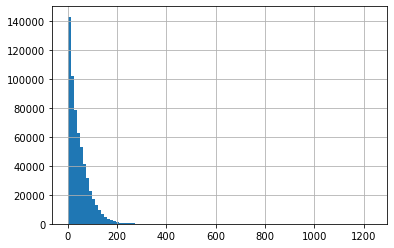

In [159]:
df['visit_spend'].hist(bins=100)

A DataFrame 'visit_spend' oszlopában található értékek eloszlását ábrázolja, a bins argumentum adja meg az osztályok számát.

-- _Hány egyedi customer_id-t tartalmaz az adathalmaz?_ --

In [160]:
#tipp: unique()
df['customer_id'].nunique() # 5000 egyedi customer_id-t

5000

In [161]:
#szűrés
cond = df['visit_spend']>1000
df[cond]

,customer_id,visit_date,visit_spend,daynum
250905,3232,2011-05-31,1234.00,425
476027,5905,2010-09-17,1177.94,169


-- _Röviden értelmezd a következő két szekciót!_ --

In [162]:
df['pelda_datum'] = df['visit_date']*2
df.head()

,customer_id,visit_date,visit_spend,daynum,pelda_datum
0,2,2010-04-01,5.97,0,2010-04-012010-04-01
1,2,2010-04-06,12.71,5,2010-04-062010-04-06
2,2,2010-04-07,34.52,6,2010-04-072010-04-07
3,2,2010-04-12,7.89,11,2010-04-122010-04-12
4,2,2010-04-14,17.17,13,2010-04-142010-04-14


Hozzáad egy új 'pelda_datum' oszlopot a DataFrame-hez, amit a 'visit_date' oszlopból vezet le úgy, hogy elemenként megkétszerezi a 'visit_date' értékeit. Mivel  ezek stringek, ezért az új érték az eredeti érték kétszer egymás után írva.

In [163]:
del df['pelda']
df.head()

KeyError: 'pelda'

Itt megpróbáljuk törölni a DataFrame 'pelda' címkével rendelkező oszlopát. Ilyen címkéjű oszlop nem létezik, ezért kaptuk a hibát.

## Melyik napon vásárolnak a legnagyobb értékben?

### A hét melyik napja van?

-- _A daynum változó megadja, hogy az adathalmazban hányadik napra esik az adott vásárlás. Az indexelés 0-tól kezdődik. Ez alapján hozz létre egy új oszlopot (day_of_week), ami 0-tól 6-ig indexeli a hét napjait. (0: hétfő, 1: kedd, stb.)_ --

In [79]:
#tipp: modulo (%)
df['day_of_week'] = df['daynum'] % 7

<AxesSubplot:>

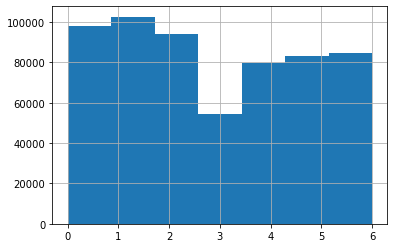

In [80]:
df['day_of_week'].hist(bins=7)

-- _Melyik napon költöttek a legtöbbet összesen?_ --

In [86]:
spend_by_day = df.groupby(['day_of_week'])['visit_spend'].sum()
print(spend_by_day)
max(range(len(spend_by_day)), key=lambda i: spend_by_day[i]) # Kedden

day_of_week
0    4726884.89
1    5293651.86
2    4772753.94
3    2197912.88
4    3131751.41
5    3247763.71
6    3458215.31
Name: visit_spend, dtype: float64


1

## Aggregálás és összefűzés

In [90]:
stat = df.groupby(['day_of_week'], as_index=False).agg({'visit_spend':'sum'})
stat

,day_of_week,visit_spend
0,0,4726884.89
1,1,5293651.86
2,2,4772753.94
3,3,2197912.88
4,4,3131751.41
5,5,3247763.71
6,6,3458215.31


-- _Töltsd ki magyarul a címet és a tengelyfeliratot!_ --

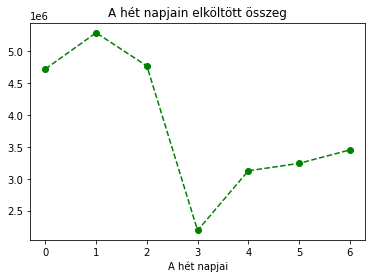

In [94]:
plt.title('A hét napjain elköltött összeg')
plt.xlabel('A hét napjai')
plt.plot(stat['day_of_week'], stat['visit_spend'], 'g--', marker='o')

-- _Egészítsd ki az alábbi kódot úgy, hogy a dátum is benne legyen a stat változó oszlopai közt!_ -- 

In [114]:
stat = df.groupby(['day_of_week', 'visit_date'], as_index=False).agg({'visit_spend':'sum'})
stat

,day_of_week,visit_date,visit_spend
0,0,2010-04-01,102625.86
1,0,2010-04-08,70863.75
2,0,2010-04-15,73373.36
3,0,2010-04-22,72482.41
4,0,2010-04-29,74175.05
...,...,...,...
439,6,2011-05-18,56778.73
440,6,2011-05-25,57801.98
441,6,2011-06-01,56714.83
442,6,2011-06-08,52401.03


-- _Ábrázold a teljes napi költést a napok függvényében (daynum)!_ --

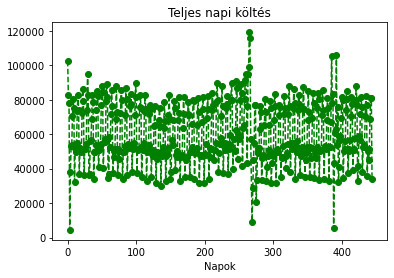

In [109]:
my_stat = df.groupby(['daynum'], as_index=False).agg({'visit_spend': 'sum'})

plt.title('Teljes napi költés')
plt.xlabel('Napok')
plt.plot(my_stat['daynum'], my_stat['visit_spend'], 'g--', marker='o')

-- _Nagyíts bele a plotba, figyeld meg a 250. és a 300. nap közötti költéseket! (A nagyítást mi előre megírtuk, neked már csak ábrázolnod kell.)_ --

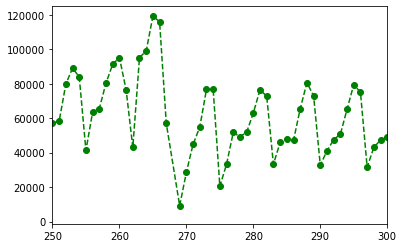

In [110]:
plt.xlim(250,300)
plt.plot(my_stat['daynum'], my_stat['visit_spend'], 'g--', marker='o')

-- _Egy mondatban foglald össze a látottakat!_ --

A naponta elköltött összegben jól látható "a hét napjain elköltött összeg"-et ábrázoló diagramon felismert minta. A legtöbbet kedden, a legkevesebbet csütörtökön költötték stb. Erről a diagramról is nagy bizonyossággal elmondható, hogy a lokális maximumok a keddi napok, míg az őket kettő nappal követő csütörtökök a lokális minimumokként jelennek meg.

## Adott napi átlagos költéstől való eltérés

In [131]:
stat.head()

,day_of_week,visit_date,visit_spend
0,0,2010-04-01,102625.86
1,0,2010-04-08,70863.75
2,0,2010-04-15,73373.36
3,0,2010-04-22,72482.41
4,0,2010-04-29,74175.05


In [132]:
# oszlopok újranevezése
stat.columns=['daynum', 'visit_date', 'daily_total']
stat.head()

,daynum,visit_date,daily_total
0,0,2010-04-01,102625.86
1,0,2010-04-08,70863.75
2,0,2010-04-15,73373.36
3,0,2010-04-22,72482.41
4,0,2010-04-29,74175.05


-- _Mi történik az alábbi szekcióban?_ --

In [134]:
max_spending = stat['daily_total'].max()

A max_spending változóba eltároljuk az egy napon elköltött maximális összeget.

-- _Számold ki újra a day_of_week változót a stat dataframeben!_ --

In [136]:
stat['day_of_week'] = stat['daynum'] % 7
stat

,daynum,visit_date,daily_total,day_of_week
0,0,2010-04-01,102625.86,0
1,0,2010-04-08,70863.75,0
2,0,2010-04-15,73373.36,0
3,0,2010-04-22,72482.41,0
4,0,2010-04-29,74175.05,0
...,...,...,...,...
439,6,2011-05-18,56778.73,6
440,6,2011-05-25,57801.98,6
441,6,2011-06-01,56714.83,6
442,6,2011-06-08,52401.03,6


-- 
* _Hozz létre egy új változót (daily_stat), ami tartalmazza a hét napjait (day_of_week) és az adott napra jellemző költés átlagát!_ 
* _Nevezd át az új változó oszlopait a következőkre: day_of_week, daily_avg!_

--

In [141]:
#tipp: aggregálj, számolj átlagot (mean)
daily_stat = stat.groupby(['day_of_week'], as_index=False).agg({'daily_total': 'mean'})
daily_stat.columns = ['day_of_week', 'daily_avg']
daily_stat

,day_of_week,daily_avg
0,0,73857.576406
1,1,82713.310313
2,2,75757.999048
3,3,34342.388750
4,4,49710.339841
5,5,51551.804921
6,6,54892.306508


-- _Mi történik az alábbi szekcióban?_ --

In [142]:
merged_df = stat.merge(daily_stat,on='day_of_week',how='left')
merged_df.head()

,daynum,visit_date,daily_total,day_of_week,daily_avg
0,0,2010-04-01,102625.86,0,73857.576406
1,0,2010-04-08,70863.75,0,73857.576406
2,0,2010-04-15,73373.36,0,73857.576406
3,0,2010-04-22,72482.41,0,73857.576406
4,0,2010-04-29,74175.05,0,73857.576406


A stat DataFrame soraihoz illesztjük a daily_stat DataFrame azon sorait, ahol a day_of_week oszlop értéke megegyezik.

-- _Számíts új oszlopot (deviation), ami a napi összes költés és a napi átlag hányadosát tartalmazza!_ --

In [146]:
merged_df['deviation'] = merged_df['daily_total'] / merged_df['daily_avg']
merged_df.head()

,daynum,visit_date,daily_total,day_of_week,daily_avg,deviation
0,0,2010-04-01,102625.86,0,73857.576406,1.389510
1,0,2010-04-08,70863.75,0,73857.576406,0.959465
2,0,2010-04-15,73373.36,0,73857.576406,0.993444
3,0,2010-04-22,72482.41,0,73857.576406,0.981381
4,0,2010-04-29,74175.05,0,73857.576406,1.004298


In [147]:
merged_df.sort_values('deviation')

,daynum,visit_date,daily_total,day_of_week,daily_avg,deviation
191,3,2010-04-04,4411.05,3,34342.388750,0.128443
246,3,2011-04-24,5278.59,3,34342.388750,0.153705
229,3,2010-12-26,9175.91,3,34342.388750,0.267189
166,2,2011-01-01,20511.14,2,75757.999048,0.270746
293,4,2010-12-27,28588.18,4,49710.339841,0.575095
...,...,...,...,...,...,...
417,6,2010-12-15,80478.58,6,54892.306508,1.466118
38,0,2010-12-23,116126.64,0,73857.576406,1.572305
292,4,2010-12-20,95236.41,4,49710.339841,1.915827
355,5,2010-12-21,99082.84,5,51551.804921,1.922005


## Eredmények kiértékelése

-- _Futtasd le a maradék programkódot és gondold végig, hogy milyen események befolyásolhatták a költési kedv kiugró változásait! Írj le minden érdekességet, amit észreveszel!_ -- 
#tipp: az egész világháló a rendelkezésedre áll

In [164]:
import calendar
from dateutil.parser import parse

In [165]:
def get_week_day(x):
    return calendar.day_name[parse(x).weekday()]

In [166]:
merged_df['day_name'] = merged_df['visit_date'].apply(get_week_day)

In [167]:
merged_df.sort_values('deviation')

,daynum,visit_date,daily_total,day_of_week,daily_avg,deviation,day_name
191,3,2010-04-04,4411.05,3,34342.388750,0.128443,Sunday
246,3,2011-04-24,5278.59,3,34342.388750,0.153705,Sunday
229,3,2010-12-26,9175.91,3,34342.388750,0.267189,Sunday
166,2,2011-01-01,20511.14,2,75757.999048,0.270746,Saturday
293,4,2010-12-27,28588.18,4,49710.339841,0.575095,Monday
...,...,...,...,...,...,...,...
417,6,2010-12-15,80478.58,6,54892.306508,1.466118,Wednesday
38,0,2010-12-23,116126.64,0,73857.576406,1.572305,Thursday
292,4,2010-12-20,95236.41,4,49710.339841,1.915827,Monday
355,5,2010-12-21,99082.84,5,51551.804921,1.922005,Tuesday
